# Lesson 5 Assignment - Targeted Marketing Campaign

## Author - Mike Pearson

In this problem we will use historical data from past customer responses to build a classification model.

We will apply the trained model to a new set of prospects to whom we may want extend an offer for a [Personal Equity Plan](https://www.investopedia.com/terms/p/pep.asp). Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classification model).

## Tasks
Use the provided Bank Data.csv file: 

1. Read in, parse and preprocess the data
2. Perform a brief exploratory analysis
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model


In [1]:
# Data set contains 600 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Bank%20Data.csv"


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
bank_data = pd.read_csv(URL)
bank_data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
print(bank_data.describe())
print(bank_data.shape)
print(bank_data.dtypes)

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000
(600, 11)
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object


In [5]:
print(bank_data['region'].value_counts())

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64


## Let's do some one hot encoding on the data

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_region = LabelEncoder()
le_married = LabelEncoder()
le_car = LabelEncoder()
le_savingacc = LabelEncoder()
le_currentacc = LabelEncoder()
le_mortgage = LabelEncoder()
le_pep = LabelEncoder()
bank_data['LESex']= le_sex.fit_transform(bank_data.sex)
bank_data['LERegion']= le_region.fit_transform(bank_data.region)
bank_data['LEMarried']= le_married.fit_transform(bank_data.married)
bank_data['LECar']= le_car.fit_transform(bank_data.car)
bank_data['LESaving']= le_savingacc.fit_transform(bank_data.save_act)
bank_data['LECurrAcc']= le_currentacc.fit_transform(bank_data.current_act)
bank_data['LEMort']= le_mortgage.fit_transform(bank_data.mortgage)
bank_data['LEPep']= le_pep.fit_transform(bank_data.pep)
print(bank_data.head())

   age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  LESex  LERegion  LEMarried  LECar  LESaving  \
0          NO       NO  YES      0         0          0      0         0   
1         YES      YES   NO      1         3          1      1         0   
2         YES       NO   NO      0         0          1      1         1   
3         YES       NO   NO      0         3          1      0         0   
4          NO       NO   NO      0         1          1      0         1   

   LECurrAcc  LEMort  LEPep  
0          0       0      1  
1          1       1      0  
2          1       0      

## Time to do the decision tree

In [7]:
bank_data = bank_data.dropna() 
results = bank_data['LEPep'].astype(str).astype(int)
banksy = bank_data.drop(['sex','region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep','LEPep'], axis = 1)

from sklearn.model_selection import train_test_split
# Ensure the decision tree is deterministic
import numpy as np
np.random.seed(101)

## split into test and training sets

X_train, X_test, y_train, y_test = train_test_split(banksy, results, test_size = 0.25, random_state=1)


from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy', random_state = 101).fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 2
model_gini = DecisionTreeClassifier(min_samples_leaf=2, random_state = 101).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

## Time for some accuracy scores

In [31]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
misclassified_ent_points = (y_test != y_ent_pred).sum()
misclassified_gini_points = (y_test != y_gini_pred).sum()
##print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
##print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))
print("Variables are\n", list(X_train))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
print("Entropy AUC = %.3f"%(auc(fpr, tpr)))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Gini Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_gini_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
print("Gini AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['age', 'income', 'children', 'LESex', 'LERegion', 'LEMarried', 'LECar', 'LESaving', 'LECurrAcc', 'LEMort']
Number of mislabeled Entropy points out of a total 150 points : 37
Entropy Accuracy = 75.33
Entropy AUC = 0.750
Number of mislabeled Entropy points out of a total 150 points : 37
Gini Accuracy = 78.00
Gini AUC = 0.775


## now for the Random Forest

With 600 rows, we will use 25 estimators (roughly the square root of 600)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=50, 
                             random_state=27,
                            n_estimators=25)

# take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=50,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

## And the accuracy is...

In [49]:
print(clf.feature_importances_)
list(zip(banksy, clf.feature_importances_))
y_rfc_pred = clf.predict(X_test)
misclassified_rfc_points = (y_test != y_rfc_pred).sum()
print(misclassified_rfc_points)
##print(banksy.head())
fpr, tpr, threshold = roc_curve(y_test, y_rfc_pred)
print("Random Forest Classification AUC = %.3f"%(auc(fpr, tpr)))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
            % (X_test.shape[0], misclassified_rfc_points))
accuracy = 100*(X_test.shape[0] - misclassified_rfc_points)/X_test.shape[0]
print("accuracy is %.3f"% accuracy)
columns = list(X_train)
print(columns[0:6])

[0.17785657 0.28223311 0.22306197 0.03019049 0.06575076 0.06599283
 0.0285582  0.04760482 0.02668775 0.05206348]
26
Random Forest Classification AUC = 0.825
Number of mislabeled Entropy points out of a total 150 points : 26
accuracy is 82.667
['age', 'income', 'children', 'LESex', 'LERegion', 'LEMarried']


## Random Forest Classification accuracy is 83% versus Decision Trees (78%)

## Now to graph the decision tree...

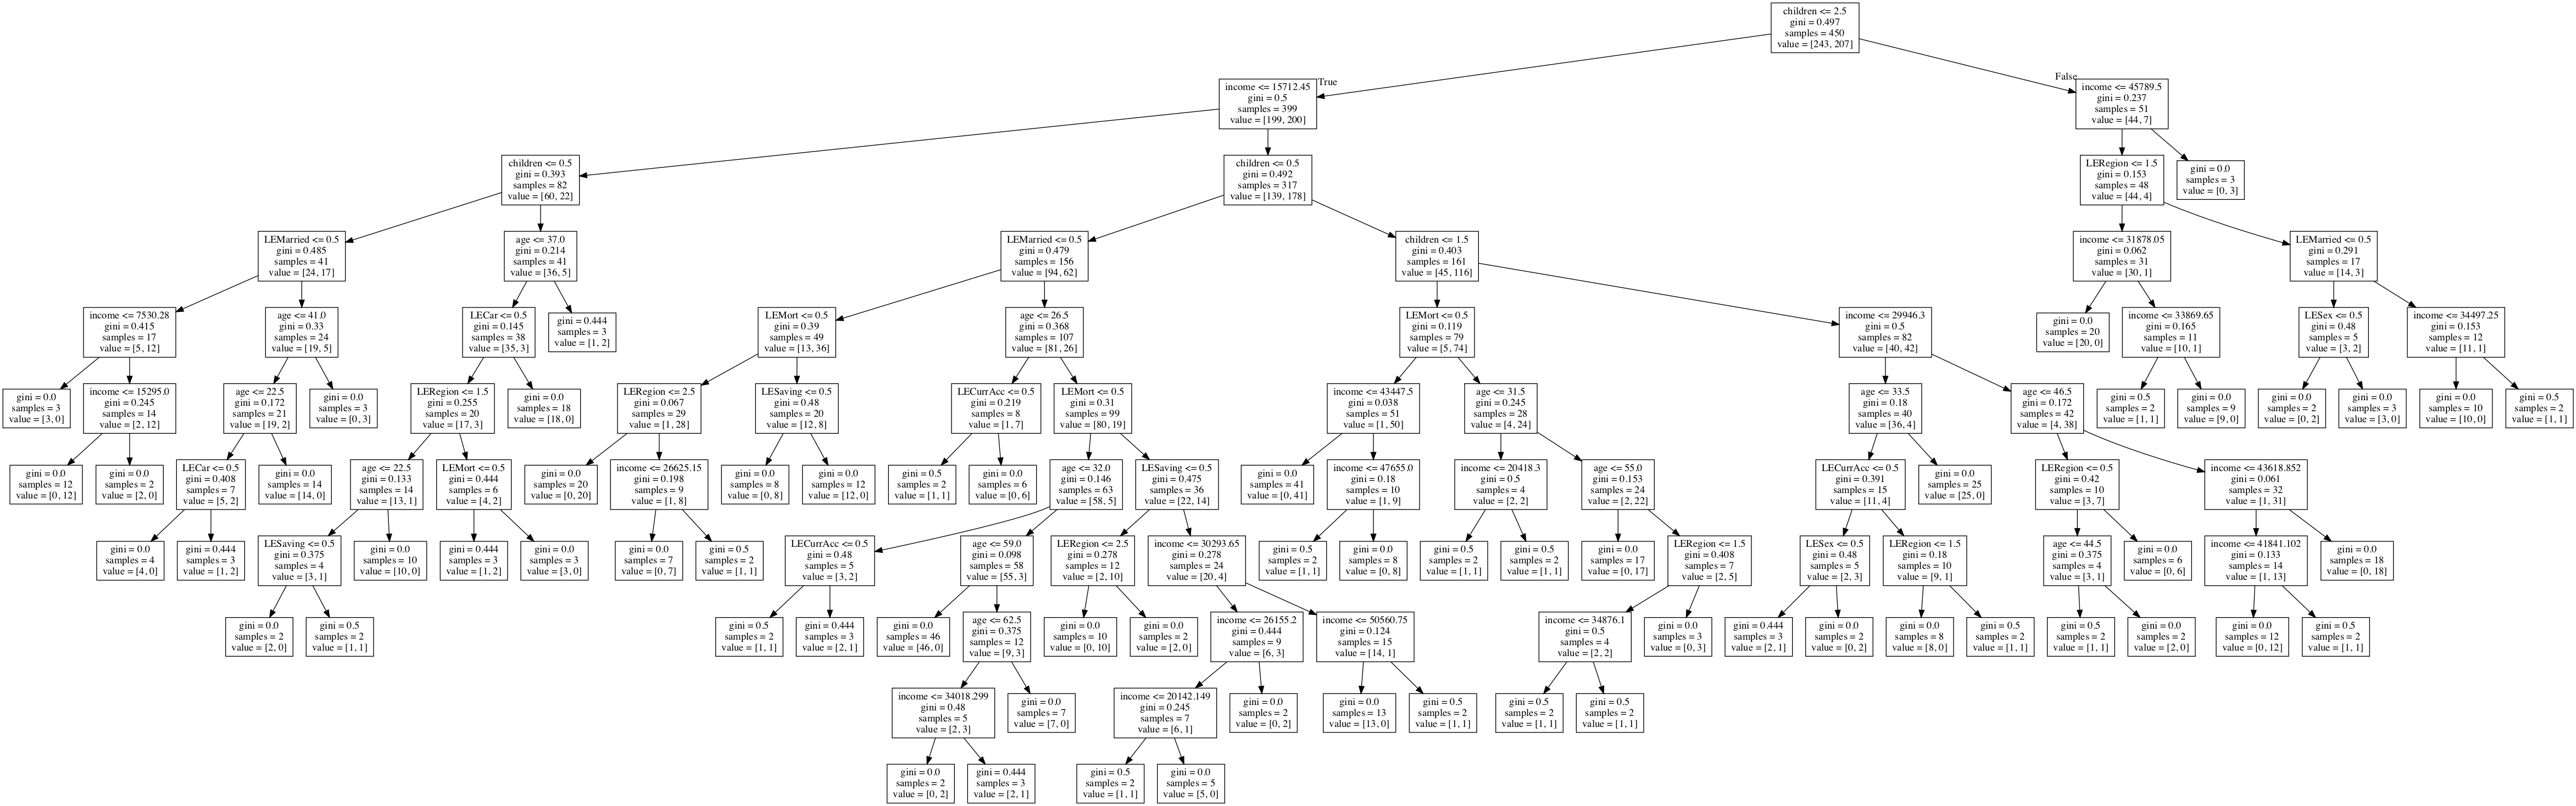

In [50]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = columns)
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

## Graph the confusion matrix of the model

In [51]:
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_rfc_pred)
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted Paid', 'Predicted Defaulted'],
    index=['True Paid', 'True Defaulted']
)


,Predicted Paid,Predicted Defaulted
True Paid,68,15
True Defaulted,18,49


## The Decision Tree did slightly better than the Random Forest